In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, TensorBoard
import datetime
import matplotlib.pyplot as plt
from keras.utils import plot_model
from PIL import Image

In [2]:
from keras.applications.vgg19 import VGG19
from keras.applications.resnet import ResNet101
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.layers import Conv2D, Dense, MaxPool2D, Flatten, Input
from keras.models import Sequential

In [3]:
trainDatagen = ImageDataGenerator(
    rotation_range=7,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.1,
    rescale=1/255.,
    validation_split=0.2
)

trainData = trainDatagen.flow_from_directory(
    directory='Malaria Cell Images Dataset',
    target_size=(160,160),
    class_mode='categorical',
    subset='training',
    batch_size=32,
    shuffle=False
)

valData = trainDatagen.flow_from_directory(
    directory='Malaria Cell Images Dataset',
    target_size=(160,160),
    class_mode='categorical',
    subset='validation',
    batch_size=32,
    shuffle=False
)

Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


#### VGG-19


In [4]:
vgg = VGG19(include_top=False, weights='imagenet', input_shape=(160, 160, 3))

for layer in vgg.layers:
    layer.trainable = False

In [5]:
vggModel = Sequential()
vggModel.add(vgg)
vggModel.add(Flatten())
vggModel.add(Dense(512))
vggModel.add(Dense(128))
vggModel.add(Dense(2, activation='softmax'))

vggModel.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

vggModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 5, 5, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 12800)             0         
                                                                 
 dense (Dense)               (None, 512)               6554112   
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 2)                 258       
                                                                 
Total params: 26,644,418
Trainable params: 6,620,034
Non-trainable params: 20,024,384
_________________________________________________________________


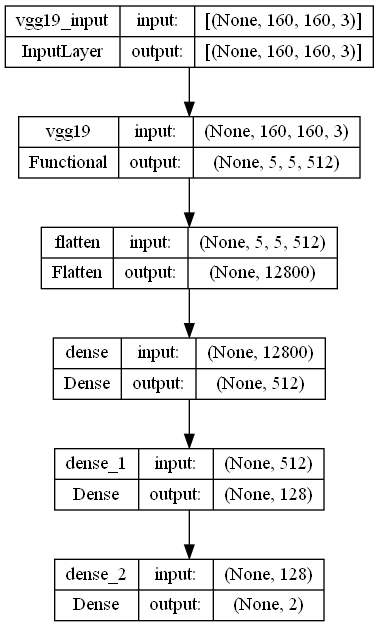

In [6]:
plot_model(vggModel, to_file='VGG_model.png', show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)
display(Image.open('VGG_model.png'))

In [7]:
tensorboard = TensorBoard(log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"), histogram_freq=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001, mode='auto', verbose=1)
checkpoint = ModelCheckpoint(filepath='VGG19_Best_Model.hdf5', monitor='val_accuracy', verbose=1, save_best_only=True)

In [8]:
historyVGG19 = vggModel.fit(trainData, epochs=20, callbacks=[checkpoint, reduce_lr, tensorboard], verbose=1, validation_data=valData)

Epoch 1/20
689/689 [==============================] - ETA: 0s - loss: 1.4079 - accuracy: 0.7274
Epoch 1: val_accuracy improved from -inf to 0.79020, saving model to VGG19_Best_Model.hdf5
689/689 [==============================] - 193s 267ms/step - loss: 1.4079 - accuracy: 0.7274 - val_loss: 0.5621 - val_accuracy: 0.7902 - lr: 0.0010
Epoch 2/20
689/689 [==============================] - ETA: 0s - loss: 0.6941 - accuracy: 0.8029
Epoch 2: val_accuracy improved from 0.79020 to 0.86770, saving model to VGG19_Best_Model.hdf5
689/689 [==============================] - 184s 266ms/step - loss: 0.6941 - accuracy: 0.8029 - val_loss: 0.3792 - val_accuracy: 0.8677 - lr: 0.0010
Epoch 3/20
689/689 [==============================] - ETA: 0s - loss: 0.4994 - accuracy: 0.8634
Epoch 3: val_accuracy improved from 0.86770 to 0.89292, saving model to VGG19_Best_Model.hdf5
689/689 [==============================] - 174s 252ms/step - loss: 0.4994 - accuracy: 0.8634 - val_loss: 0.2667 - val_accuracy: 0.8929 - 

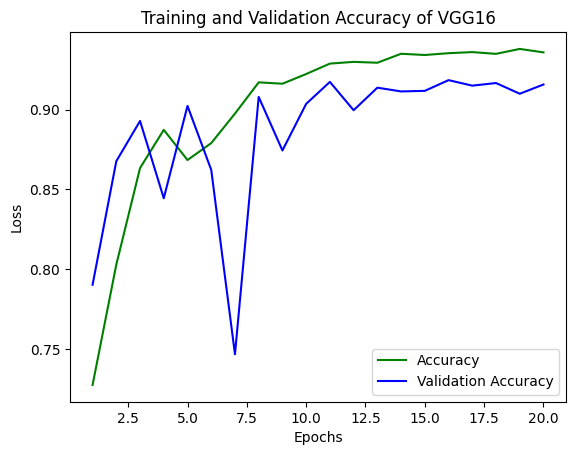

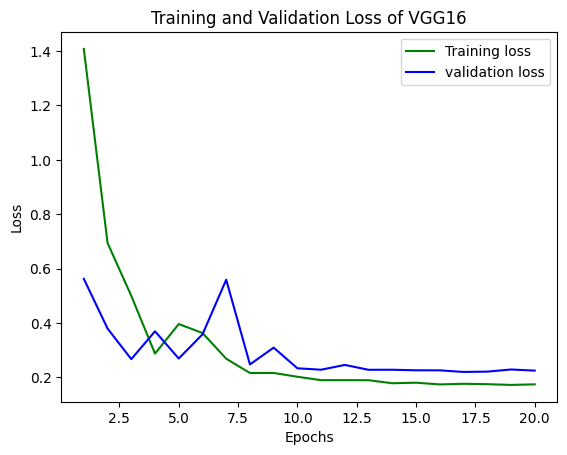

In [9]:
# Training and Validation Accuracy Graph
train = historyVGG19.history['accuracy']
val = historyVGG19.history['val_accuracy']
epochs = range(1,21)
plt.plot(epochs, train, 'g', label='Accuracy')
plt.plot(epochs, val, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy of VGG16')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Training and Validation Loss Graph
train = historyVGG19.history['loss']
val = historyVGG19.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, train, 'g', label='Training loss')
plt.plot(epochs, val, 'b', label='validation loss')
plt.title('Training and Validation Loss of VGG16')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### RESNET-101

In [10]:
resnet = ResNet101(include_top=False, weights='imagenet', input_shape=(160, 160, 3))

for layer in resnet.layers:
    layer.trainable = False

In [11]:
resnetModel = Sequential()
resnetModel.add(resnet)
resnetModel.add(Flatten())
resnetModel.add(Dense(512))
resnetModel.add(Dense(128))
resnetModel.add(Dense(2, activation='softmax'))

resnetModel.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

resnetModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 5, 5, 2048)        42658176  
                                                                 
 flatten_1 (Flatten)         (None, 51200)             0         
                                                                 
 dense_3 (Dense)             (None, 512)               26214912  
                                                                 
 dense_4 (Dense)             (None, 128)               65664     
                                                                 
 dense_5 (Dense)             (None, 2)                 258       
                                                                 
Total params: 68,939,010
Trainable params: 26,280,834
Non-trainable params: 42,658,176
_________________________________________________________________


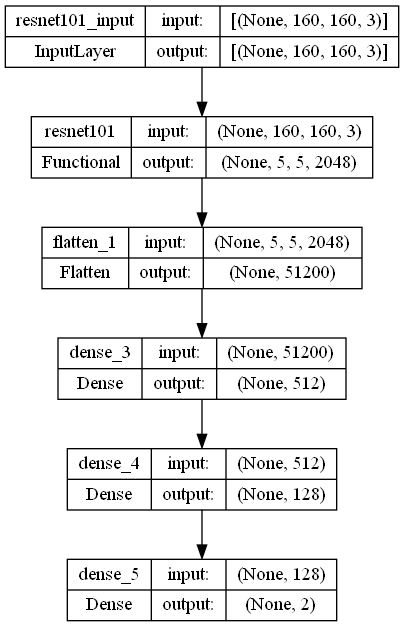

In [12]:
plot_model(resnetModel, to_file='RESNET101_model.png', show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)
display(Image.open('RESNET101_model.png'))

In [13]:
tensorboard = TensorBoard(log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"), histogram_freq=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001, mode='auto', verbose=1)
checkpoint = ModelCheckpoint(filepath='RESNET101_Best_Model.hdf5', monitor='val_accuracy', verbose=1, save_best_only=True)

In [14]:
historyRESNET101 = resnetModel.fit(trainData, epochs=20, callbacks=[checkpoint, reduce_lr, tensorboard], verbose=1, validation_data=valData)

Epoch 1/20
689/689 [==============================] - ETA: 0s - loss: 1.2409 - accuracy: 0.5370
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to RESNET152_Best_Model.hdf5
689/689 [==============================] - 217s 304ms/step - loss: 1.2409 - accuracy: 0.5370 - val_loss: 0.7203 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/20
689/689 [==============================] - ETA: 0s - loss: 0.8717 - accuracy: 0.5726
Epoch 2: val_accuracy improved from 0.50000 to 0.50526, saving model to RESNET152_Best_Model.hdf5
689/689 [==============================] - 222s 321ms/step - loss: 0.8717 - accuracy: 0.5726 - val_loss: 0.7167 - val_accuracy: 0.5053 - lr: 0.0010
Epoch 3/20
689/689 [==============================] - ETA: 0s - loss: 0.7674 - accuracy: 0.5798
Epoch 3: val_accuracy improved from 0.50526 to 0.67205, saving model to RESNET152_Best_Model.hdf5
689/689 [==============================] - 220s 319ms/step - loss: 0.7674 - accuracy: 0.5798 - val_loss: 0.6258 - val_accurac

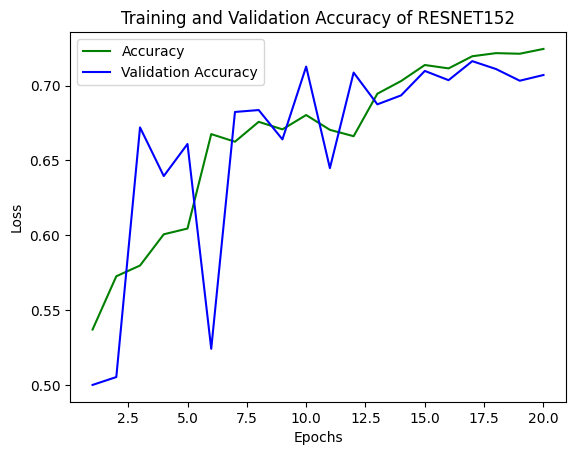

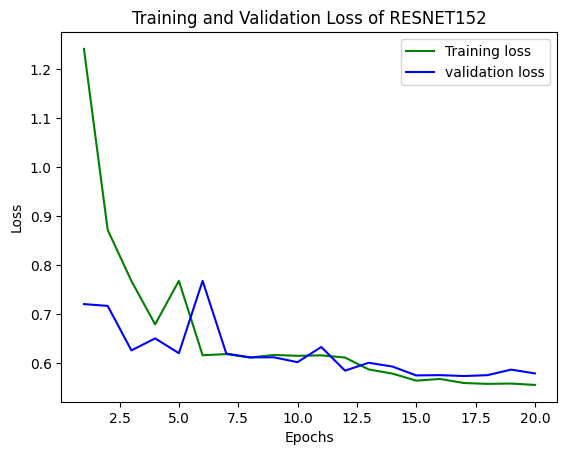

In [15]:
# Training and Validation Accuracy Graph
train = historyRESNET101.history['accuracy']
val = historyRESNET101.history['val_accuracy']
epochs = range(1,21)
plt.plot(epochs, train, 'g', label='Accuracy')
plt.plot(epochs, val, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy of RESNET152')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Training and Validation Loss Graph
train = historyRESNET101.history['loss']
val = historyRESNET101.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, train, 'g', label='Training loss')
plt.plot(epochs, val, 'b', label='validation loss')
plt.title('Training and Validation Loss of RESNET152')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Inception V3

In [16]:
inception = InceptionV3(include_top=False, weights='imagenet', input_shape=(160, 160, 3))

for layer in inception.layers:
    layer.trainable = False

In [17]:
inceptionModel = Sequential()
inceptionModel.add(inception)
inceptionModel.add(Flatten())
inceptionModel.add(Dense(512))
inceptionModel.add(Dense(128))
inceptionModel.add(Dense(2, activation='softmax'))

inceptionModel.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

inceptionModel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten_2 (Flatten)         (None, 18432)             0         
                                                                 
 dense_6 (Dense)             (None, 512)               9437696   
                                                                 
 dense_7 (Dense)             (None, 128)               65664     
                                                                 
 dense_8 (Dense)             (None, 2)                 258       
                                                                 
Total params: 31,306,402
Trainable params: 9,503,618
Non-trainable params: 21,802,784
_________________________________________________________________


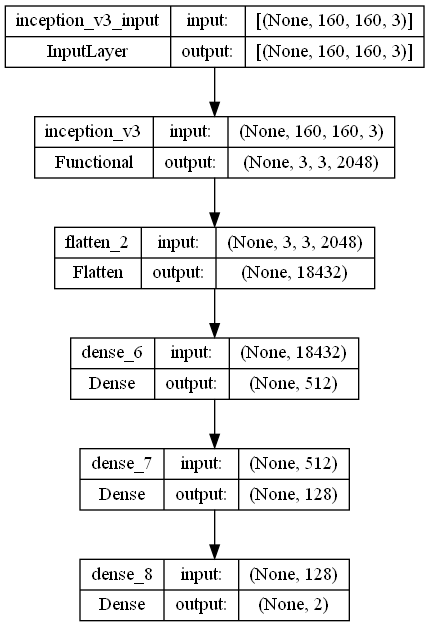

In [18]:
plot_model(inceptionModel, to_file='INCEPTION_V3_model.png', show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)
display(Image.open('INCEPTION_V3_model.png'))

In [19]:
tensorboard = TensorBoard(log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"), histogram_freq=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001, mode='auto', verbose=1)
checkpoint = ModelCheckpoint(filepath='INCEPTION_V3_Best_Model.hdf5', monitor='val_accuracy', verbose=1, save_best_only=True)

In [20]:
historyINCEPTION = inceptionModel.fit(trainData, epochs=20, callbacks=[checkpoint, reduce_lr, tensorboard], verbose=1, validation_data=valData)

Epoch 1/20
689/689 [==============================] - ETA: 0s - loss: 5.0828 - accuracy: 0.8549
Epoch 1: val_accuracy improved from -inf to 0.89256, saving model to INCEPTION_V3_Best_Model.hdf5
689/689 [==============================] - 158s 221ms/step - loss: 5.0828 - accuracy: 0.8549 - val_loss: 0.2953 - val_accuracy: 0.8926 - lr: 0.0010
Epoch 2/20
689/689 [==============================] - ETA: 0s - loss: 2.8748 - accuracy: 0.8756
Epoch 2: val_accuracy did not improve from 0.89256
689/689 [==============================] - 144s 209ms/step - loss: 2.8748 - accuracy: 0.8756 - val_loss: 0.4832 - val_accuracy: 0.8249 - lr: 0.0010
Epoch 3/20
689/689 [==============================] - ETA: 0s - loss: 0.5257 - accuracy: 0.9072
Epoch 3: val_accuracy improved from 0.89256 to 0.90236, saving model to INCEPTION_V3_Best_Model.hdf5
689/689 [==============================] - 143s 208ms/step - loss: 0.5257 - accuracy: 0.9072 - val_loss: 0.2649 - val_accuracy: 0.9024 - lr: 0.0010
Epoch 4/20
689/689

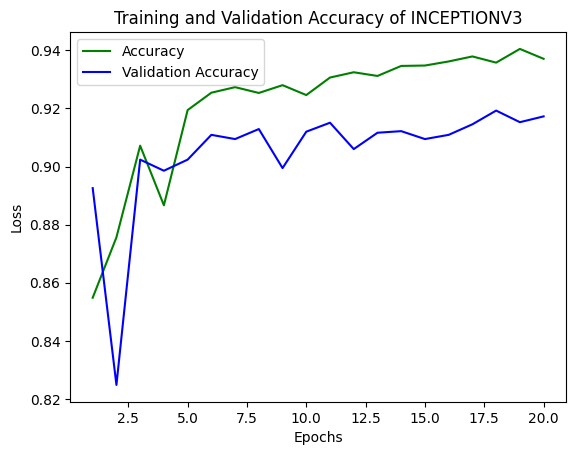

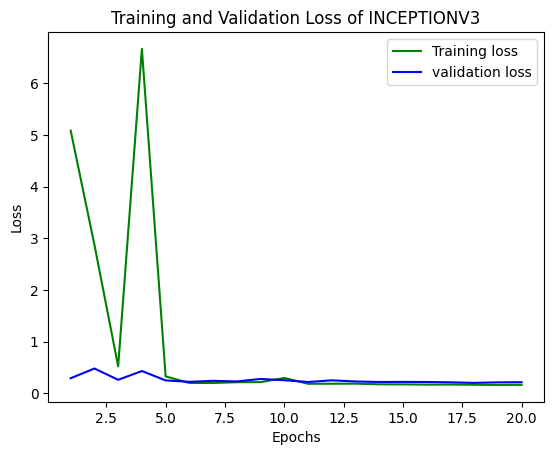

In [21]:
# Training and Validation Accuracy Graph
train = historyINCEPTION.history['accuracy']
val = historyINCEPTION.history['val_accuracy']
epochs = range(1,21)
plt.plot(epochs, train, 'g', label='Accuracy')
plt.plot(epochs, val, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy of INCEPTIONV3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Training and Validation Loss Graph
train = historyINCEPTION.history['loss']
val = historyINCEPTION.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, train, 'g', label='Training loss')
plt.plot(epochs, val, 'b', label='validation loss')
plt.title('Training and Validation Loss of INCEPTIONV3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### InceptionResNetV2

In [22]:
inceptionresnetV2 = InceptionResNetV2(include_top=False, weights='imagenet', input_shape=(160, 160, 3))

for layer in inceptionresnetV2.layers:
    layer.trainable = False

In [23]:
inceptionresnetV2model = Sequential()
inceptionresnetV2model.add(inceptionresnetV2)
inceptionresnetV2model.add(Flatten())
inceptionresnetV2model.add(Dense(512))
inceptionresnetV2model.add(Dense(128))
inceptionresnetV2model.add(Dense(2, activation='softmax'))

inceptionresnetV2model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

inceptionresnetV2model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 3, 3, 1536)       54336736  
 onal)                                                           
                                                                 
 flatten_3 (Flatten)         (None, 13824)             0         
                                                                 
 dense_9 (Dense)             (None, 512)               7078400   
                                                                 
 dense_10 (Dense)            (None, 128)               65664     
                                                                 
 dense_11 (Dense)            (None, 2)                 258       
                                                                 
Total params: 61,481,058
Trainable params: 7,144,322
Non-trainable params: 54,336,736
__________________________________

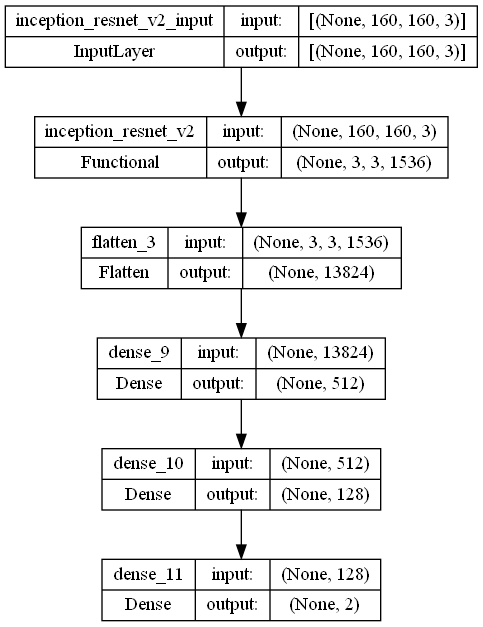

In [24]:
plot_model(inceptionresnetV2model, to_file='INCEPTION_RESNET_V2_model.png', show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)
display(Image.open('INCEPTION_RESNET_V2_model.png'))

In [25]:
tensorboard = TensorBoard(log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"), histogram_freq=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001, mode='auto', verbose=1)
checkpoint = ModelCheckpoint(filepath='INCEPTIONRESNET_V2_Best_Model.hdf5', monitor='val_accuracy', verbose=1, save_best_only=True)

In [26]:
historyINCEPTIONRESNETV2 = inceptionresnetV2model.fit(trainData, epochs=20, callbacks=[checkpoint, reduce_lr, tensorboard], verbose=1, validation_data=valData)

Epoch 1/20
689/689 [==============================] - ETA: 0s - loss: 2.7502 - accuracy: 0.8574
Epoch 1: val_accuracy improved from -inf to 0.91742, saving model to INCEPTIONRESNET_V2_Best_Model.hdf5
689/689 [==============================] - 184s 251ms/step - loss: 2.7502 - accuracy: 0.8574 - val_loss: 0.2195 - val_accuracy: 0.9174 - lr: 0.0010
Epoch 2/20
689/689 [==============================] - ETA: 0s - loss: 1.6296 - accuracy: 0.8866
Epoch 2: val_accuracy did not improve from 0.91742
689/689 [==============================] - 173s 251ms/step - loss: 1.6296 - accuracy: 0.8866 - val_loss: 0.2923 - val_accuracy: 0.9172 - lr: 0.0010
Epoch 3/20
689/689 [==============================] - ETA: 0s - loss: 1.4614 - accuracy: 0.9028
Epoch 3: val_accuracy improved from 0.91742 to 0.92559, saving model to INCEPTIONRESNET_V2_Best_Model.hdf5
689/689 [==============================] - 171s 247ms/step - loss: 1.4614 - accuracy: 0.9028 - val_loss: 0.5540 - val_accuracy: 0.9256 - lr: 0.0010
Epoch 

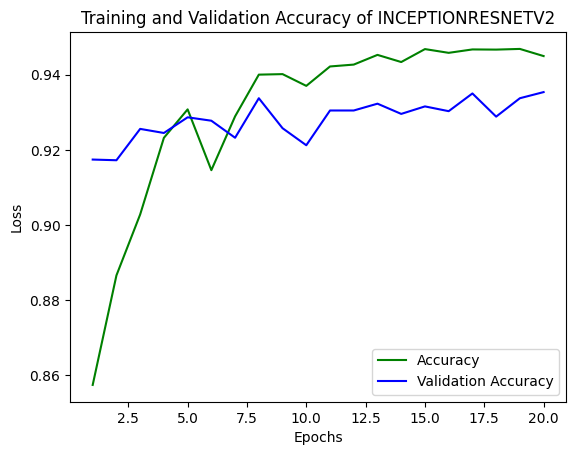

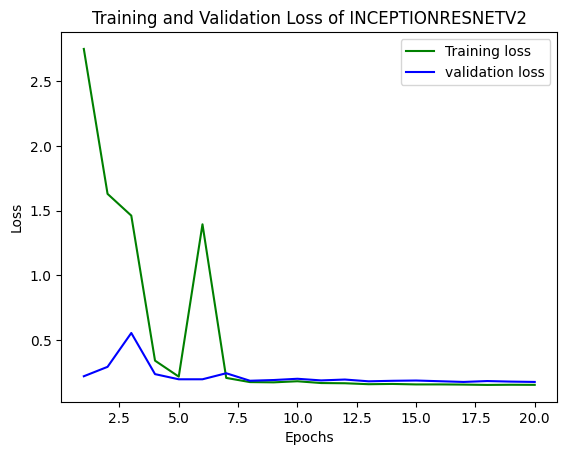

In [27]:
# Training and Validation Accuracy Graph
train = historyINCEPTIONRESNETV2.history['accuracy']
val = historyINCEPTIONRESNETV2.history['val_accuracy']
epochs = range(1,21)
plt.plot(epochs, train, 'g', label='Accuracy')
plt.plot(epochs, val, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy of INCEPTIONRESNETV2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Training and Validation Loss Graph
train = historyINCEPTIONRESNETV2.history['loss']
val = historyINCEPTIONRESNETV2.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, train, 'g', label='Training loss')
plt.plot(epochs, val, 'b', label='validation loss')
plt.title('Training and Validation Loss of INCEPTIONRESNETV2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Custom Model

In [29]:
customModel = Sequential()
customModel.add(Input((160,160,3)))

customModel.add(Conv2D(32, (5,5)))
customModel.add(Conv2D(32, (5,5)))
customModel.add(MaxPool2D((3,3)))

customModel.add(Conv2D(64, (5,5)))
customModel.add(Conv2D(64, (5,5)))
customModel.add(MaxPool2D((3,3)))

customModel.add(Conv2D(32, (5,5)))
customModel.add(Conv2D(32, (5,5)))
customModel.add(MaxPool2D((3,3)))

customModel.add(Flatten())
customModel.add(Dense(512))
customModel.add(Dense(2, activation='softmax'))

customModel.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

customModel.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_304 (Conv2D)         (None, 156, 156, 32)      2432      
                                                                 
 conv2d_305 (Conv2D)         (None, 152, 152, 32)      25632     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_306 (Conv2D)         (None, 46, 46, 64)        51264     
                                                                 
 conv2d_307 (Conv2D)         (None, 42, 42, 64)        102464    
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                 

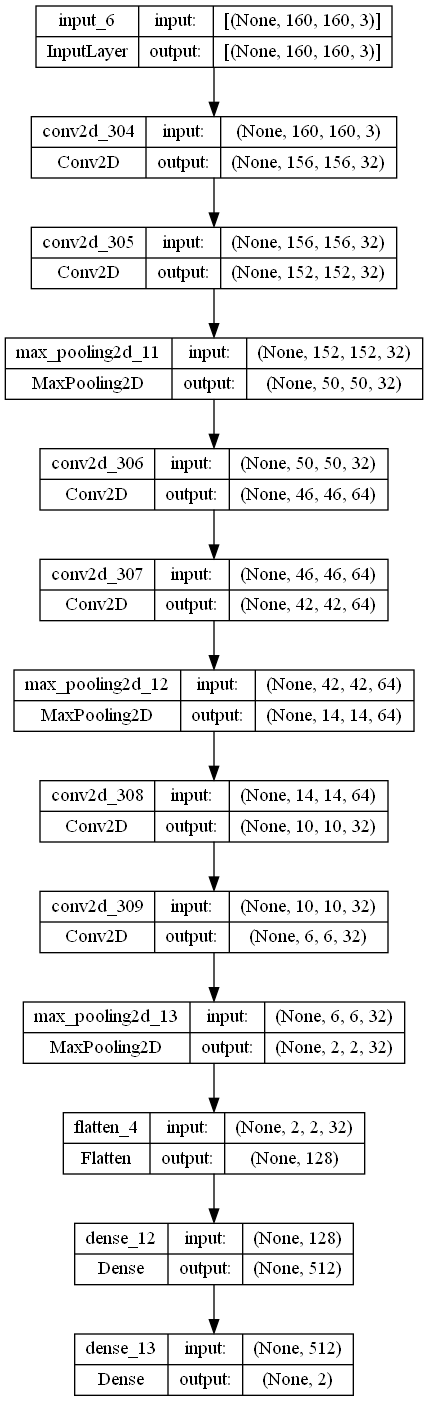

In [30]:
plot_model(customModel, to_file='CUSTOM_model.png', show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)
display(Image.open('CUSTOM_model.png'))

In [31]:
tensorboard = TensorBoard(log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"), histogram_freq=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001, mode='auto', verbose=1)
checkpoint = ModelCheckpoint(filepath='Custom_Best_Model.hdf5', monitor='val_accuracy', verbose=1, save_best_only=True)

In [32]:
historyCustom = customModel.fit(trainData, epochs=20, callbacks=[checkpoint, reduce_lr, tensorboard], verbose=1, validation_data=valData)

Epoch 1/20
689/689 [==============================] - ETA: 0s - loss: 1.9713 - accuracy: 0.5852
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to Custom_Best_Model.hdf5
689/689 [==============================] - 142s 202ms/step - loss: 1.9713 - accuracy: 0.5852 - val_loss: 0.6929 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/20
689/689 [==============================] - ETA: 0s - loss: 0.5627 - accuracy: 0.7363
Epoch 2: val_accuracy improved from 0.50000 to 0.86134, saving model to Custom_Best_Model.hdf5
689/689 [==============================] - 141s 205ms/step - loss: 0.5627 - accuracy: 0.7363 - val_loss: 0.4184 - val_accuracy: 0.8613 - lr: 0.0010
Epoch 3/20
689/689 [==============================] - ETA: 0s - loss: 0.4117 - accuracy: 0.8270
Epoch 3: val_accuracy improved from 0.86134 to 0.89946, saving model to Custom_Best_Model.hdf5
689/689 [==============================] - 145s 211ms/step - loss: 0.4117 - accuracy: 0.8270 - val_loss: 0.2808 - val_accuracy: 0.8995

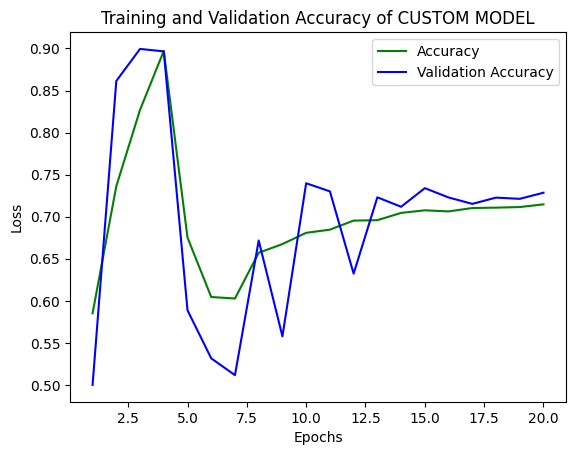

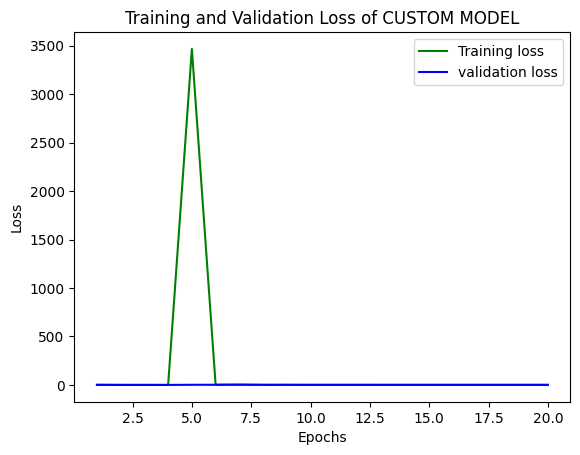

In [33]:
# Training and Validation Accuracy Graph
train = historyCustom.history['accuracy']
val = historyCustom.history['val_accuracy']
epochs = range(1,21)
plt.plot(epochs, train, 'g', label='Accuracy')
plt.plot(epochs, val, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy of CUSTOM MODEL')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Training and Validation Loss Graph
train = historyCustom.history['loss']
val = historyCustom.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, train, 'g', label='Training loss')
plt.plot(epochs, val, 'b', label='validation loss')
plt.title('Training and Validation Loss of CUSTOM MODEL')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### All Models Graphs Combined

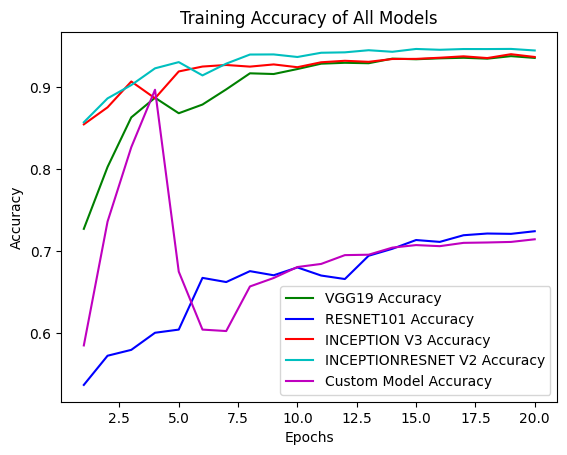

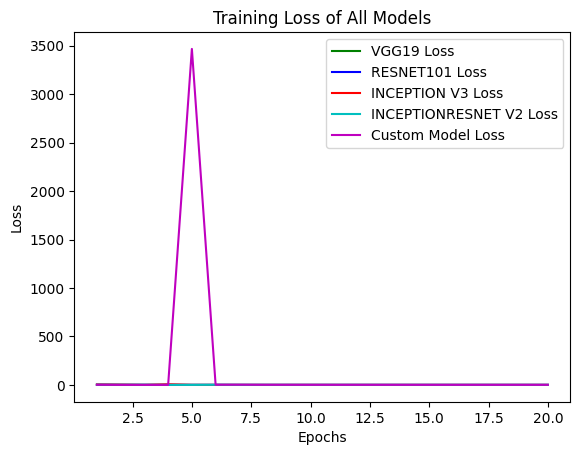

In [34]:
trainVGG = historyVGG19.history['accuracy']
trainRESNET = historyRESNET101.history['accuracy']
trainINCEPTION = historyINCEPTION.history['accuracy']
trainINCEPTIONRESNETV2 = historyINCEPTIONRESNETV2.history['accuracy']
trainCustom = historyCustom.history['accuracy']
epochs = range(1,21)
plt.plot(epochs, trainVGG, 'g', label='VGG19 Accuracy')
plt.plot(epochs, trainRESNET, 'b', label='RESNET101 Accuracy')
plt.plot(epochs, trainINCEPTION, 'r', label='INCEPTION V3 Accuracy')
plt.plot(epochs, trainINCEPTIONRESNETV2, 'c', label='INCEPTIONRESNET V2 Accuracy')
plt.plot(epochs, trainCustom, 'm', label='Custom Model Accuracy')
plt.title('Training Accuracy of All Models')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

trainVGG = historyVGG19.history['loss']
trainRESNET = historyRESNET101.history['loss']
trainINCEPTION = historyINCEPTION.history['loss']
trainINCEPTIONRESNETV2 = historyINCEPTIONRESNETV2.history['loss']
trainCustom = historyCustom.history['loss']
epochs = range(1,21)
plt.plot(epochs, trainVGG, 'g', label='VGG19 Loss')
plt.plot(epochs, trainRESNET, 'b', label='RESNET101 Loss')
plt.plot(epochs, trainINCEPTION, 'r', label='INCEPTION V3 Loss')
plt.plot(epochs, trainINCEPTIONRESNETV2, 'c', label='INCEPTIONRESNET V2 Loss')
plt.plot(epochs, trainCustom, 'm', label='Custom Model Loss')
plt.title('Training Loss of All Models')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

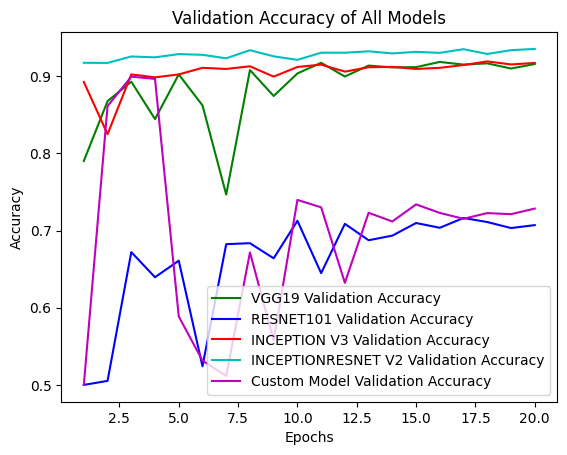

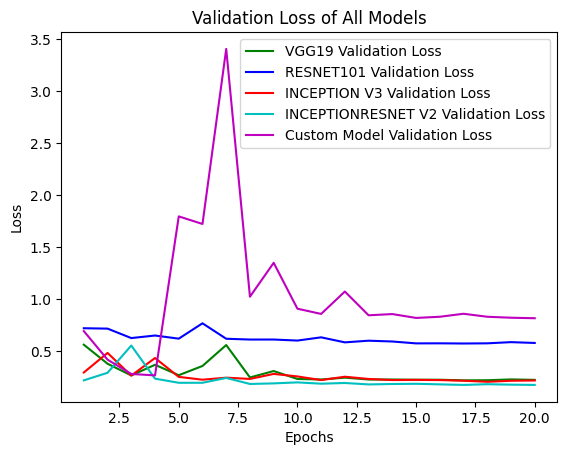

In [35]:
import matplotlib.pyplot as plt

trainVGG = historyVGG19.history['val_accuracy']
trainRESNET = historyRESNET101.history['val_accuracy']
trainINCEPTION = historyINCEPTION.history['val_accuracy']
trainINCEPTIONRESNETV2 = historyINCEPTIONRESNETV2.history['val_accuracy']
trainCustom = historyCustom.history['val_accuracy']
epochs = range(1,21)
plt.plot(epochs, trainVGG, 'g', label='VGG19 Validation Accuracy')
plt.plot(epochs, trainRESNET, 'b', label='RESNET101 Validation Accuracy')
plt.plot(epochs, trainINCEPTION, 'r', label='INCEPTION V3 Validation Accuracy')
plt.plot(epochs, trainINCEPTIONRESNETV2, 'c', label='INCEPTIONRESNET V2 Validation Accuracy')
plt.plot(epochs, trainCustom, 'm', label='Custom Model Validation Accuracy')
plt.title('Validation Accuracy of All Models')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

trainVGG = historyVGG19.history['val_loss']
trainRESNET = historyRESNET101.history['val_loss']
trainINCEPTION = historyINCEPTION.history['val_loss']
trainINCEPTIONRESNETV2 = historyINCEPTIONRESNETV2.history['val_loss']
trainCustom = historyCustom.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, trainVGG, 'g', label='VGG19 Validation Loss')
plt.plot(epochs, trainRESNET, 'b', label='RESNET101 Validation Loss')
plt.plot(epochs, trainINCEPTION, 'r', label='INCEPTION V3 Validation Loss')
plt.plot(epochs, trainINCEPTIONRESNETV2, 'c', label='INCEPTIONRESNET V2 Validation Loss')
plt.plot(epochs, trainCustom, 'm', label='Custom Model Validation Loss')
plt.title('Validation Loss of All Models')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [36]:
vggModel.save('VGG19_FullyTrained.hdf5')
customModel.save('Custom_FullyTrained.hdf5')
resnetModel.save('RESNET101_FullyTrained.hdf5')
inceptionModel.save('INCEPTION_V3_FullyTrained.hdf5')
inceptionresnetV2.save('INCEPTIONRESNET_V2_FullyTrained.hdf5')